# Import software libraries and load the dataset #

In [1]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import pandas as pd                    # Manipulate and analyze data frames.
import sklearn                         # Perform feature engineering and machine learning.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets
import matplotlib                      # Create charts.
import matplotlib.pyplot as plt

# Summarize software libraries used.
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- TensorFlow {}'.format(tensorflow.__version__))
print('- Keras {}'.format(keras.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Python {}\n'.format(sys.version))

# Load the dataset.
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} testing records.'.format(len(X_test.data)))

# Comment the following two lines to make outcomes stochastic, or supply different seed values.
seed(2)
tensorflow.random.set_seed(2)

Libraries used in this project:
- NumPy 1.25.2
- pandas 2.0.3
- scikit-learn 1.2.2
- TensorFlow 2.15.0
- Keras 2.15.0
- Matplotlib 3.7.1
- Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]

4422102/4422102 [==============================] - 0s 0us/step
Loaded 60000 training records.
Loaded 10000 testing records.


# Get acquainted with the dataset

In [2]:
print('Shape of feature space: {}\n'.format(X_train[0].shape))

print('A few examples:\n')
print(X_train[7:10])

Shape of feature space: (28, 28)

A few examples:

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ... 180   0   0]
  [  0   0   0 ...  72   0   0]
  [  0   0   0 ...  70   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...  39   1   0]
  ...
  [  0   0   0 ... 238   0   0]
  [  0   0   0 ... 131   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   7   0   0]
  ...
  [  0   0   0 ...   0   9   0]
  [  0   0   0 ...   0   3   0]
  [  0   0   0 ...   0   0   0]]]


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(10):
    print('{} ({})'.format(class_names[i], np.unique(y_train)[i]))

T-shirt/top (0)
Trouser (1)
Pullover (2)
Dress (3)
Coat (4)
Sandal (5)
Shirt (6)
Sneaker (7)
Bag (8)
Ankle boot (9)


# Visualize the data examples

In [ ]:
# Plot just first example for now.
plt.imshow(X_train[0], cmap = 'gray')
plt.title('Class: {} ({})'.format(class_names[y_train[0]], y_train[0]));

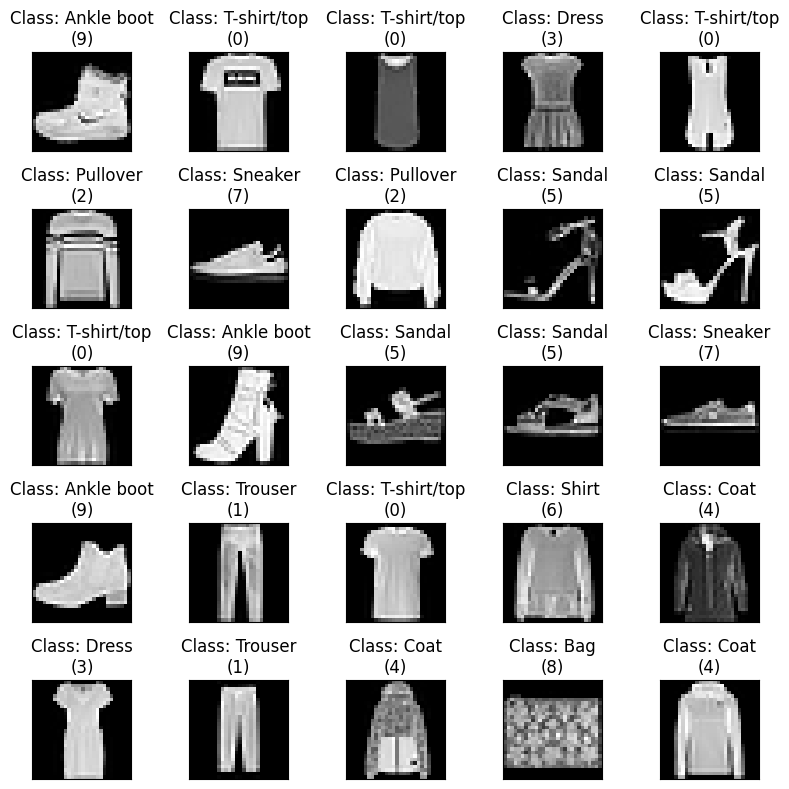

In [5]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (8, 8))

for i, ax in zip(range(25), axes.flatten()):
    ax.imshow(X_train[i,:,:], cmap = 'gray')  # Plot training example.
    ax.title.set_text('Class: {}\n({})'.format(class_names[y_train[i]], y_train[i]))

# Turn off axis ticks for readability.
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()

# Prepare the data for training with Keras

In [6]:
# Reshape arrays to add grayscale flag.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

from keras.utils import to_categorical

# One-hot encode the data for each label.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('One-hot encoding for first image: {}'.format(y_train[0]))

One-hot encoding for first image: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Split the dataset

In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  random_state = 50)

print(f'Training features:   {X_train.shape}')
print(f'Validation features: {X_val.shape}')
print(f'Training labels:     {y_train.shape}')
print(f'Validation labels:   {y_val.shape}')

Training features:   (45000, 28, 28, 1)
Validation features: (15000, 28, 28, 1)
Training labels:     (45000, 10)
Validation labels:   (15000, 10)


# Build the CNN structure

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import LeakyReLU

cnn = Sequential()

# Start stacking layers one by one.
cnn.add(Conv2D(filters = 32,
               kernel_size = (3, 3),  # First convolutional layer (32 output filters, 3×3 filter size).
               input_shape = (28, 28, 1),
               padding = 'same',
               activation = 'linear'))  # Will add leaky ReLU layer next.
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((2, 2), padding = 'same'))  # First pooling layer with 2×2 size.

cnn.add(Conv2D(64, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((2, 2), padding = 'same'))

cnn.add(Conv2D(128, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((2, 2), padding = 'same'))

cnn.add(Flatten())  # Connect convolution and dense layer.
cnn.add(Dense(10, activation = 'softmax'))  # Dense output layer with softmax activation.

print('The CNN structure has been built.')

The CNN structure has been built.


# Compile the model and examine the layers

In [9]:
cnn.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

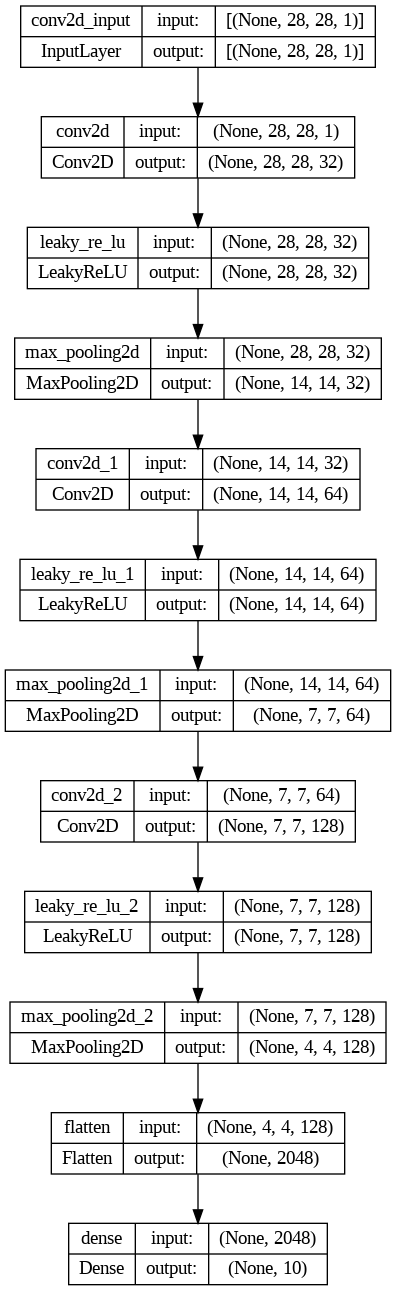

In [10]:
from keras.utils import plot_model
plot_model(cnn, show_shapes = True)

# Train the model

In [ ]:
cnn_trained = cnn.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 1,
                      verbose = 1)

1406/1407 [============================>.] - ETA: 0s - loss: 0.5641 - accuracy: 0.8393

# Evaluate the model on the test data

In [ ]:
eval_test = cnn.evaluate(X_test, y_test, verbose = 0)

print('Loss: {}'.format(round(eval_test[0], 2)))
print('Accuracy: {:.0f}%'.format(eval_test[1] * 100))

# Make predictions on the test data

In [ ]:
prediction = cnn.predict(X_test)

# Extract class number from one-hot-encoded array.
prediction = np.argmax(np.round(prediction), axis = 1)
actual = np.argmax(np.round(y_test), axis = 1)

print('Actual class:    {}'.format(actual[:10]))
print('Predicted class: {}'.format(prediction[:10]))

# Visualize the predictions for several examples

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (12, 12))

for i, ax in zip(range(25), axes.flatten()):

    if actual[i] == prediction[i]:
        ax.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    else:
        ax.imshow(X_test[i].reshape(28, 28))  # Highlight incorrect predictions.

    ax.title.set_text('Actual: {} ({})\nPredicted: {} ({})'. \
                      format(class_names[actual[i]], actual[i],
                             class_names[prediction[i]], prediction[i]))

# Turn off axis ticks for readability.
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()